<a href="https://colab.research.google.com/github/akshaygaur2407/Akshay/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary python libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
train=pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [ ]:
test=pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

In [ ]:
train.shape

(59400, 40)

In [ ]:
labels=pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')#Uploading the labels file

In [ ]:
test.shape

(14850, 40)

In [ ]:
len(train.columns)==len(test.columns)

True

In [ ]:
train['origin']='train'
test['origin']='test'

In [ ]:
all_data = train.append(test)
len(all_data) == (len(train)+len(test))

True

In [ ]:
all_data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,origin
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,train
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,train
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,train
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,train
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,train
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,train
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,train
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,train


In [ ]:
#function to compute missing values and plot them
def missingdata(data):
  total=data.isnull().sum().sort_values()
  percent=(data.isnull().sum()/data.isnull().count()*100).sort_values()
  frame=pd.concat([total,percent],axis=1,keys=['total','percent'])
  frame=frame[frame['percent']>0]
  f,ax =plt.subplots(figsize=(8,6))
  plt.xticks(rotation='90')
  fig=sns.barplot(frame.index,frame['percent'],color='g',alpha=0.8)
  return frame

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,total,percent
subvillage,470,0.632997
permit,3793,5.108418
public_meeting,4155,5.595960
funder,4504,6.065993
installer,4532,6.103704
scheme_management,4846,6.526599
scheme_name,35258,47.485522


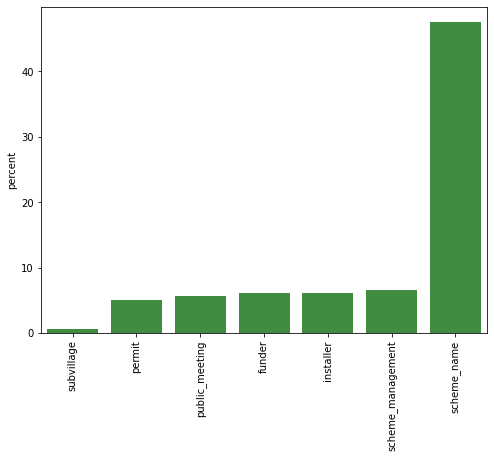

In [ ]:
missingdata(all_data)

In [ ]:
labels.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


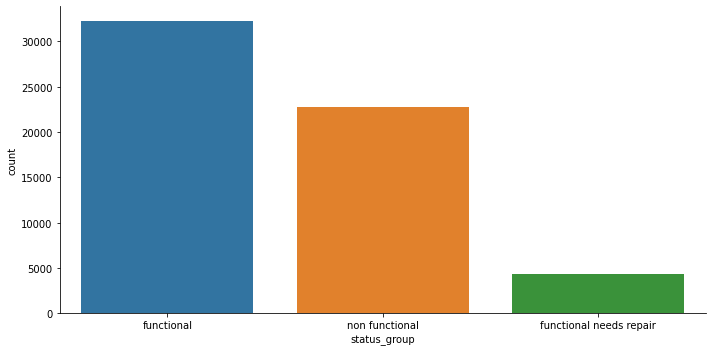

In [ ]:
sns.factorplot('status_group',data=labels,kind='count',aspect=2)

In [ ]:
categorical_data=all_data.select_dtypes(['object']).columns
categorical_data

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'origin'],
      dtype='object')

In [ ]:
numerical_data=all_data.select_dtypes(['float64','int64']).columns
numerical_data

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [ ]:
all_data.groupby(['subvillage'])['id'].count().sort_values(ascending=False)[:10]

subvillage
Shuleni       646
Majengo       631
Madukani      629
Kati          467
Mtakuja       322
Sokoni        294
M             243
Muungano      215
Mbuyuni       210
Songambele    194
Name: id, dtype: int64

In [ ]:
all_data.loc[all_data.subvillage.str.len()==1,'subvillage']='other'
all_data.subvillage.fillna(value='other',inplace=True)
all_data.subvillage.isnull().sum()

0

In [ ]:
all_data=all_data.drop('amount_tsh',axis=1)#to many 0 values to handle

In [ ]:
all_data.date_recorded[:10]

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
5    2011-03-13
6    2012-10-01
7    2012-10-09
8    2012-11-03
9    2011-08-03
Name: date_recorded, dtype: object

In [ ]:
all_data.loc[all_data.date_recorded=='other','date_recorded']='2011-03-01'
all_data['year_recorded']=all_data.date_recorded.str.slice(0,4)
all_data['month_recorded']=all_data.date_recorded.str.slice(5,7)
all_data=all_data.drop('date_recorded',axis=1)

In [ ]:
all_data.month_recorded.value_counts()

03    22423
02    15481
07     8664
01     7903
10     6908
04     4976
08     4181
11     1683
12      771
06      464
05      403
09      393
Name: month_recorded, dtype: int64

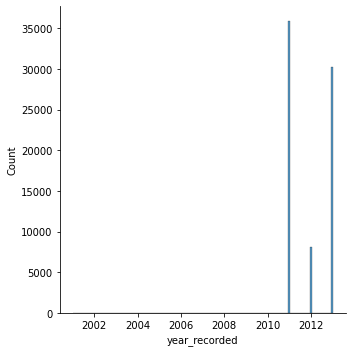

In [ ]:
all_data.year_recorded = all_data.year_recorded.astype('float64', errors='ignore')
all_data.month_recorded = all_data.month_recorded.astype('float64', errors='ignore')
sns.displot(all_data.year_recorded)

In [ ]:
all_data.groupby(['year_recorded'])['id'].count()

year_recorded
2001.0        1
2002.0        1
2004.0       41
2011.0    35908
2012.0     8089
2013.0    30210
Name: id, dtype: int64

In [ ]:
all_data.loc[all_data.year_recorded==2001.0,'year_recorded']=2011.0
all_data.loc[all_data.year_recorded==2002.0,'year_recorded']=2012.0
all_data.loc[all_data.year_recorded==2004.0,'year_recorded']=2014.0

In [ ]:
all_data.groupby(['year_recorded'])['id'].count()

year_recorded
2011.0    35909
2012.0     8090
2013.0    30210
2014.0       41
Name: id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


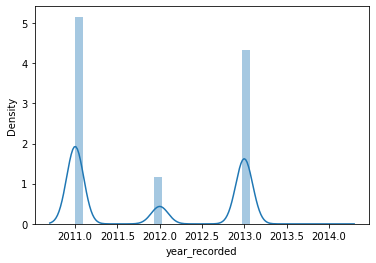

In [ ]:
sns.distplot(all_data.year_recorded)

In [ ]:
all_data.groupby(['funder']).size().sort_values(ascending=False)

funder
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
                          ...  
Mhuzu                         1
Miab                          1
Migration                     1
Mikumi G                      1
Zingibali Secondary           1
Length: 2140, dtype: int64

In [ ]:
all_data.funder.fillna('other',inplace=True)
all_data.loc[all_data.funder.str.len()==1,'funder']='other'

In [ ]:
all_data.groupby(['funder']).size().sort_values(ascending=False)[:10]

funder
Government Of Tanzania    11299
other                      5684
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
dtype: int64

In [ ]:
all_data.loc[((all_data.longitude == 0)|(all_data.longitude=='other')),'longitude'] = np.NaN
all_data.longitude.isnull().sum()

2269

In [ ]:
all_data.longitude.value_counts()

39.119409    2
39.090577    2
39.088437    2
39.080573    2
39.095684    2
            ..
34.258922    1
36.922075    1
40.106777    1
36.882744    1
35.005922    1
Name: longitude, Length: 71869, dtype: int64

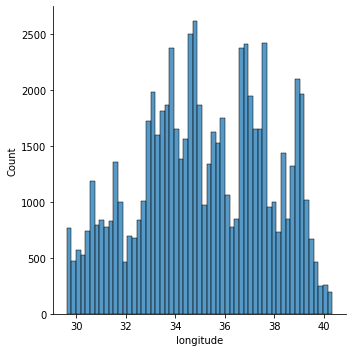

In [ ]:
sns.displot(all_data.longitude)

In [ ]:
all_data.longitude = all_data.longitude.astype('float64', errors='ignore')

In [ ]:
all_data['longitude']=all_data['longitude'].fillna(all_data.groupby(['subvillage'])['longitude'].transform('mean'))
all_data.longitude.isnull().sum()

1410

In [ ]:
all_data.longitude.fillna(all_data.groupby(['ward'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

37

In [ ]:
all_data.longitude.fillna(all_data.groupby(['lga'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

0

In [ ]:
all_data.latitude = all_data.latitude.astype('float64', errors='ignore')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


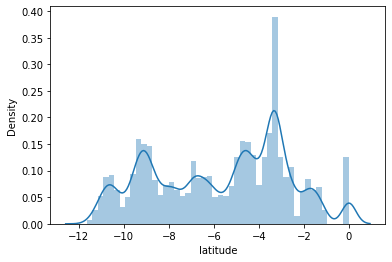

In [ ]:
sns.distplot(all_data.latitude)

In [ ]:
all_data.latitude = all_data.latitude.round(2)

In [ ]:
all_data.loc[all_data.latitude == 0, 'latitude'] = np.nan
all_data.latitude.isnull().sum()

2269

In [ ]:
all_data.latitude.fillna(all_data.groupby(['subvillage'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

1410

In [ ]:
all_data.latitude.fillna(all_data.groupby(['ward'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

37

In [ ]:
all_data.latitude.fillna(all_data.groupby(['lga'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


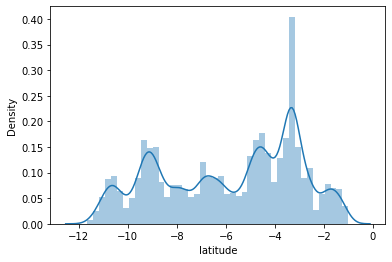

In [ ]:
sns.distplot(all_data.latitude)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


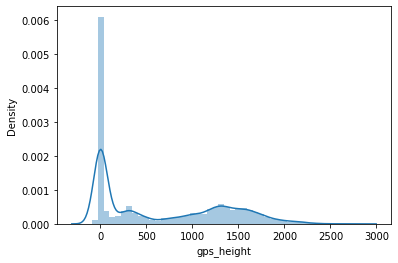

In [ ]:
sns.distplot(all_data.gps_height)

In [ ]:
all_data.loc[all_data.gps_height == 0, 'gps_height'] = np.nan
all_data.gps_height.isnull().sum()

25649

In [ ]:
all_data.gps_height.fillna(all_data.groupby(['subvillage'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

19108

In [ ]:
all_data.gps_height.fillna(all_data.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

2222

In [ ]:
all_data.gps_height.fillna(all_data.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

114

In [ ]:
all_data.gps_height.fillna(all_data.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


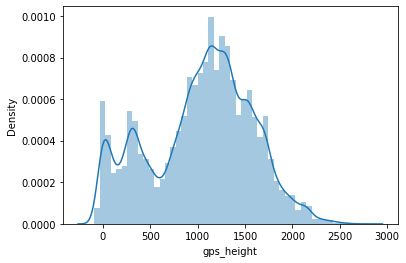

In [ ]:
sns.distplot(all_data.gps_height)

In [ ]:
all_data.groupby(['installer'])['id'].count().sort_values(ascending=False)[:10]

installer
DWE           21751
Government     2282
RWE            1498
Commu          1347
DANIDA         1305
KKKT           1120
Hesawa         1070
0               980
TCRS            887
CES             765
Name: id, dtype: int64

In [ ]:
all_data.installer.fillna('other', inplace=True)
all_data.loc[all_data.installer.str.len() == 1, 'installer'] = 'other'
all_data.installer.isnull().sum()

0

In [ ]:
all_data.groupby(['wpt_name']).size().sort_values(ascending=False)[1:10]

wpt_name
Shuleni            2183
Zahanati           1034
Msikitini           647
Kanisani            390
Sokoni              328
Bombani             323
Ofisini             321
School              260
Shule Ya Msingi     247
dtype: int64

In [ ]:
all_data = all_data.drop('wpt_name', axis=1)

In [ ]:
all_data = all_data.drop('num_private', axis=1)

In [ ]:
all_data.groupby(['basin']).size()

basin
Internal                    9642
Lake Nyasa                  6332
Lake Rukwa                  3059
Lake Tanganyika             8052
Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Ruvuma / Southern Coast     5587
Wami / Ruvu                 7577
dtype: int64

In [ ]:
all_data.groupby(['region_code']).size().sort_values(ascending=False)[:10]

region_code
11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
dtype: int64

In [ ]:
all_data = all_data.drop('region', axis=1)

In [ ]:
all_data = all_data.drop('district_code', axis=1)

In [ ]:
all_data.groupby(['lga']).size().sort_values(ascending=False)[:10]

lga
Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
Kilosa          1368
Kasulu          1322
Mbozi           1286
Bagamoyo        1263
Meru            1244
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


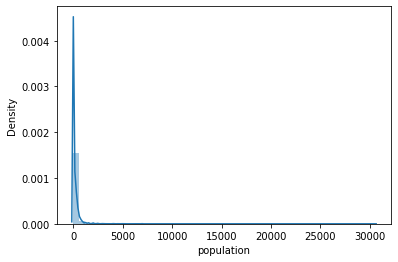

In [ ]:
sns.distplot(all_data.population)

In [ ]:
all_data.groupby(['population']).size().sort_values(ascending=False)[:10]

population
0      26834
1       8782
200     2370
150     2328
250     2087
300     1842
50      1437
100     1419
500     1274
350     1252
dtype: int64

In [ ]:
all_data.loc[all_data.population == 0, 'population'] = np.nan
all_data.population.isnull().sum()

26834

In [ ]:
all_data.population.fillna(all_data.groupby(['subvillage'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

19359

In [ ]:
all_data.population.fillna(all_data.groupby(['ward'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

2364

In [ ]:
all_data.population.fillna(all_data.groupby(['lga'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

114

In [ ]:
all_data.population.fillna(all_data.groupby(['region_code'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


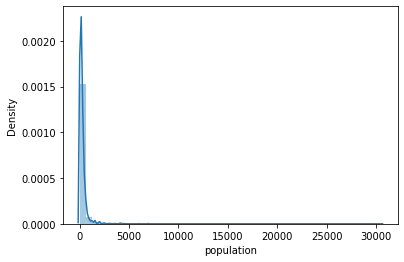

In [ ]:
sns.distplot(all_data.population)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


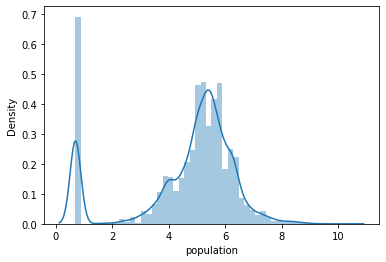

In [ ]:
sns.distplot(np.log1p(all_data.population));

In [ ]:
all_data['population_log'] = np.log1p(all_data.population)
all_data = all_data.drop('population', axis=1)

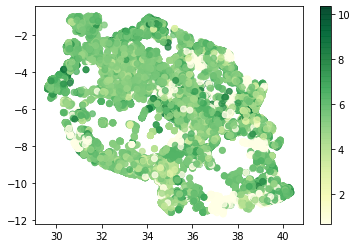

In [ ]:
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.population_log, cmap = 'YlGn')
cbar = plt.colorbar()

In [ ]:
all_data.groupby(['public_meeting']).size()

public_meeting
False     6346
True     63749
dtype: int64

In [ ]:
all_data.loc[all_data.public_meeting == True, 'public_meeting'] = 1
all_data.loc[all_data.public_meeting == False, 'public_meeting'] = 0
all_data.public_meeting = all_data.public_meeting.astype('int', errors='ignore')
all_data.public_meeting.fillna(1, inplace=True)
all_data.public_meeting.isnull().sum()

0

In [ ]:
all_data.recorded_by.unique() 

array(['GeoData Consultants Ltd'], dtype=object)

In [ ]:
all=all_data.drop('recorded_by',axis=1)

In [ ]:
all_data.scheme_management.fillna('other', inplace=True)
all_data.scheme_management.isnull().sum()

0

In [ ]:
all_data.groupby(['scheme_management']).size().sort_values(ascending=False)[:10]

scheme_management
VWC                 45917
WUG                  6496
other                4846
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
dtype: int64

In [ ]:
all_data = all_data.drop('scheme_name', axis=1)

In [ ]:
all_data.groupby(['permit'])['id'].count().sort_values(ascending=False)

permit
True     48606
False    21851
Name: id, dtype: int64

In [ ]:
all_data.permit.isnull().sum()

3793

In [ ]:
all_data.permit.fillna('True',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


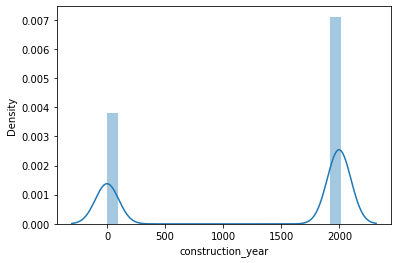

In [ ]:
sns.distplot(all_data.construction_year) 

In [ ]:
all_data.loc[all_data.construction_year == 0, 'construction_year'] = np.nan
all_data.construction_year.isnull().sum()

25969

In [ ]:
all_data.construction_year.fillna(all_data.groupby(['subvillage'])['construction_year'] \
                                  .transform('median'), inplace=True)
all_data.construction_year.isnull().sum()

18875

In [ ]:
all_data.construction_year.fillna(all_data.groupby(['ward'])['construction_year'] \
                                  .transform('median'), inplace=True)
all_data.construction_year.isnull().sum()

2205

In [ ]:
all_data.construction_year.fillna(all_data.groupby(['lga'])['construction_year'] \
                                  .transform('median'), inplace=True)
all_data.construction_year.isnull().sum()

114

In [ ]:
all_data.construction_year.fillna(all_data.groupby(['region_code'])['construction_year'] \
                                  .transform('median'), inplace=True)
all_data.construction_year.isnull().sum()

0

In [ ]:
all_data.construction_year = all_data.construction_year.round(0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


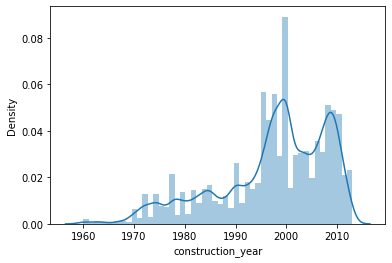

In [ ]:
sns.distplot(all_data.construction_year)

In [ ]:
all_data.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()[:10] 

extraction_type  extraction_type_group  extraction_type_class
afridev          afridev                handpump                  2208
cemo             other motorpump        motorpump                  108
climax           other motorpump        motorpump                   41
gravity          gravity                gravity                  33263
india mark ii    india mark ii          handpump                  3029
india mark iii   india mark iii         handpump                   135
ksb              submersible            submersible               1790
mono             mono                   motorpump                 3628
nira/tanira      nira/tanira            handpump                 10205
other            other                  other                     8102
dtype: int64

In [ ]:
all_data = all_data.drop('extraction_type', axis=1)
all_data = all_data.drop('extraction_type_group', axis=1)
all_data.loc[all_data.scheme_management == 'None', 'scheme_management'] = 'other'

In [ ]:
all_data.groupby(['payment','payment_type']).size()

payment                payment_type
never pay              never pay       31712
other                  other            1314
pay annually           annually         4570
pay monthly            monthly         10397
pay per bucket         per bucket      11266
pay when scheme fails  on failure       4842
unknown                unknown         10149
dtype: int64

In [ ]:
all_data = all_data.drop('payment', axis=1)

In [ ]:
all_data.groupby(['water_quality','quality_group']).size()

water_quality       quality_group
coloured            colored            623
fluoride            fluoride           244
fluoride abandoned  fluoride            23
milky               milky             1005
salty               salty             6082
salty abandoned     salty              423
soft                good             63505
unknown             unknown           2345
dtype: int64

In [ ]:
all_data = all_data.drop('quality_group', axis=1)

In [ ]:
all_data.groupby(['source','source_type','source_class']).size()

source                source_type           source_class
dam                   dam                   surface           840
hand dtw              borehole              groundwater      1108
lake                  river/lake            surface           950
machine dbh           borehole              groundwater     13822
other                 other                 unknown           261
rainwater harvesting  rainwater harvesting  surface          2863
river                 river/lake            surface         11964
shallow well          shallow well          groundwater     21140
spring                spring                groundwater     21216
unknown               other                 unknown            86
dtype: int64

In [ ]:
all_data = all_data.drop('source_type', axis=1)

In [ ]:
all_data.groupby(['waterpoint_type','waterpoint_type_group']).size() 

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              150
communal standpipe           communal standpipe       35628
communal standpipe multiple  communal standpipe        7611
dam                          dam                          8
hand pump                    hand pump                21884
improved spring              improved spring            959
other                        other                     8010
dtype: int64

In [ ]:
all_data = all_data.drop('waterpoint_type_group', axis=1)

# Feature Engineering

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


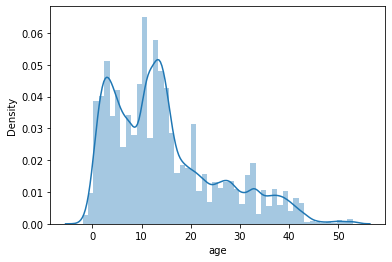

In [ ]:
all_data['age'] = all_data.year_recorded - all_data.construction_year
sns.distplot(all_data.age)

In [ ]:
all_data.loc[all_data.age < 0, 'age'] = all_data.age.mean()

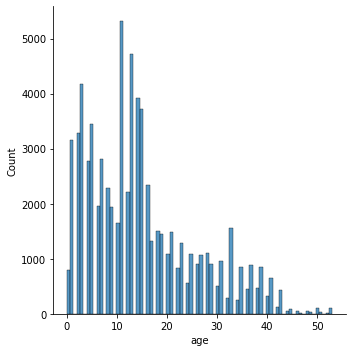

In [ ]:
sns.displot(all_data.age)

In [ ]:
all_data.loc[(all_data.month_recorded <= 2) & (all_data.month_recorded >= 1), 'season'] = 1
all_data.loc[(all_data.month_recorded <= 5) & (all_data.month_recorded >= 3), 'season'] = 2
all_data.loc[(all_data.month_recorded <= 10) & (all_data.month_recorded >= 6), 'season'] = 3
all_data.loc[(all_data.month_recorded <= 12) & (all_data.month_recorded >= 11), 'season'] = 4
all_data.groupby(['season']).size()

season
1.0    23384
2.0    27802
3.0    20610
4.0     2454
dtype: int64

In [ ]:
all_data.to_csv('all_data.csv')
from google.colab import files
files.download('all_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>